# Introduction to Data Science Libraries: Using Pandas, Seaborn, and Matplotlib to Analyze Physics Data

Author: Julie Butler

Date Created: March 7, 2023

Last Modified: April 8, 2023

The goal of this notebook is to introduce you to three libraries that are commonly used in data science to analyze, format, and display data sets that are stored in files. This notebook is also framed around exploring data sets specific to physics. It thus will cover some of the common problems encountered when analyzing data from physics experiments or theoretical calculations.

[View this notebook on Google Colab.](https://colab.research.google.com/drive/1RLwGBn1JL2zhmtLbB4lXSlORXcEpcdQf?usp=sharing)

## Introduction to Data Science Libraries

This notebook will introduce you to three libraries commonly used in data science and help analyze physics data. Pandas provide ways to easily import data from a file and save it in something called a Pandas Dataframe, which allows us to easily display the data as a table, access the different columns of data, and begin formatting the data for later analysis. The other two libraries introduced in this notebook, Seaborn and Matplotlib, are used to create graphs from the data set. Each graphing library has its strengths and reasons to use, which will be discussed later in the notebook.

It maybe easier to think about these libraries by thinking about their relationships to each other.  NumPy, one of the standard Python libraries, provides an implementation of a data structure called arrays, which allows us to easily manipulate one and two dimensional data sets.  However, it can be hard to display a matrix of data and extract different column, especially since NumPy does not provide headers for its columns.  Pandas is simply a wrapper for NumPy arrays which provides an easy way to display, access, and manipulate two dimensional data sets. However, underneath the hood it is simply using NumPy arrays.

Likewise, Matplotlib is the simplest graphing library avaliable in Python and its default graphs are quite plain.  Seaborn is a wrapper of the Matplotlib class which adds more formatting to the default graphs and also provides the creation of some compound graphs, such as `pairplot` that we will look at below.

## Introduction to the Data Set

The data set we will investigate in this notebook contains the following data for every measurable isotope: number of neutrons, number of protons, number of nucleons, binding energy, the uncertainty of binding energy measurement, atomic mass, and uncertainty on mass measurement. This notebook section will help you better understand this data set and why nuclear scientists may want to study it.

### Isotopes and Nucleons

The nucleus of an atom contains two types of particles: positively charged particles called **protons** and neutral particles called **neutrons**. The total number of protons in the nucleus is Z, and the total number of neutrons is N. Protons and neutrons are both types of **nucleons**, so the total number of nucleons in the nucleus is A = Z + N. 

The number of protons in the nucleus determines what **element** it is. For example, all nuclei with 12 protons are carbon nuclei, all nuclei with 1 proton are hydrogen, and all nuclei with 20 protons are calcium. However, the number of neutrons in a nucleus does not define an element. So there are carbon atoms with 11 neutrons, 12 neutrons, 13 neutrons, and so on. Nuclei that have the same number of protons but different numbers of neutrons are referred to as **isotopes** of each other.

### Atomic Mass

An atom's **atomic mass** is the atom's total mass (i.e., the nucleus and the protons). Note that it is not the same as the sum of the masses of the particles that make up the atom. This will be explored in the next section.

### Binding Energy

The mass of an atomic nucleus will be less than the total mass of its constituent particles. This difference in mass is called the binding energy, as it is the energy required to hold the atom together. Remember that mass and energy are related by the famous equation from Einstein: $E = mc^2$.

To calculate the theoretical binding energies using Einstein's equation, we can define the binding energy as:

$$BE = Mc^2 - mc^2,$$

where M is the total mass of all of the particles in the atom, m is the actual atomic mass of the atom, and c is the speed of light in a vacuum. We can define M as:

$$M = Z(m_p + m_e) + Nm_n,$$

where m$_p$ is the mass of a proton, m$_e$ is the mass of an electron, and m$_n$ is the mass of a neutron. So, we can rewrite the binding energy as:

$$BE = ((m_p + m_e)Z + m_nN - m)c^2.$$

Next, we can define the atomic mass of hydrogen as one proton plus one electron:
$$m_h = m_p + m_e,$$

which means we can rewrite the binding energy as:

$$BE = (m_hZ + m_nN - m)c^2,$$

where $m_h$ = 1.007 MeV, $m_n$ = 1.008 MeV and $c^2$ = 931.49 MeV/u.

The binding energies in the data set are experimental binding energies. Later in this notebook, we will determine how well the experimental binding energies correspond to the theoretical ones we defined in this section.

### Uncertainties

The atomic masses and binding energies in this data set were collected through experiments. Any data collected through experimentation has uncertainty in it. Though these are usually relatively small, they are also presented in this data set. 

## Imports

In [1]:
# THIRD PARTY IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns

In [2]:
# GOOGLE DRIVE SET UP
from google.colab import drive
# Mount my Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**EXERCISE 0:** Change the below directory to match where you have the data file stored on Google Drive. `/content/gdrive/My Drive` is the main folder in Google drive, other folders can be added to this path using `/`.

In [3]:
# Directory to retrieve data files from (###CHANGE THIS###)
data_dir = '/content/gdrive/My Drive/Teaching/DSECOP/Module 3: Data Science Intro/'

## Pandas

### Importing the Data as a Dataframe

The data set is saved in the file "NuclearData.tsv". The file ending ".tsv" means that the data in the file will be separated into columns using a tab. This and a csv (comma separate columns) are common ways to store data in column format. Luckily, both ".csv" files and ".tsv" files are easy to import with the Pandas method `read_csv.` The below code cell imports the data file from where it is saved. We must also specify that the columns of our data are separated with tabs (`\t` represented a tab in Python). The data is imported as a Python Dataframe, saved in `nuclear_data.tsv` You can read more about the `read_csv` function [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [4]:
nuclear_data = pd.read_csv(data_dir+"nuclear_data.tsv", sep='\t')

First, lets confirm that `nuclear_data` is a Pandas Dataframe by printing its type.


In [5]:
type(nuclear_data)

pandas.core.frame.DataFrame

Now lets print `nuclear_data` to see what a Dataframe looks like.

In [6]:
nuclear_data

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.0,0.0,1008664.91582,0.00049
1,0,1,1,H,0.0,0.0,1007825.03224,0.00009
2,1,1,2,H,1112.283,0.000,2014101.77811,0.00012
3,2,1,3,H,2827.265,0.000,3016049.28199,0.00023
4,1,2,3,He,2572.680,0.000,3016029.32265,0.00022
...,...,...,...,...,...,...,...,...
3431,176,117,293,Eh,7095#,3#,293208680#,870#
3432,175,118,293,Ei,7077#,2#,293213498#,753#
3433,177,117,294,Eh,7092#,2#,294210974#,708#
3434,176,118,294,Ei,7079#,2#,294214132#,712#


A Dataframe allows us to easily display the different columns and rows of the data file in a table. It even used the column labels from the data file to name the other columns. The columns from left to right are the number of neutrons, number of protons, number of nucleons (i.e., the total number of protons and neutrons or A = N+Z), the elemental symbol, the binding energy per nucleon, the uncertainty on the binding energy, the atomic mass, and the uncertainty on the atomic mass.

Sometimes it is easier to display just the first few rows of a data frame instead of just what a basic print statement gives. We can accomplish this with the `head` function. You can read more about it [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).



In [7]:
nuclear_data.head()

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.0,0.0,1008664.91582,0.00049
1,0,1,1,H,0.0,0.0,1007825.03224,0.00009
2,1,1,2,H,1112.283,0.000,2014101.77811,0.00012
3,2,1,3,H,2827.265,0.000,3016049.28199,0.00023
4,1,2,3,He,2572.680,0.000,3016029.32265,0.00022


### Access the Data Columns

A Pandas Dataframe can behave like a dictionary where the column headings are the keys, and the columns are the values. The column headings can even be printed using the `keys` function, exactly like dictionaries.

In [8]:
nuclear_data.keys()

Index(['N', 'Z', 'A', 'EL', 'BE', 'BEd', 'MASS', 'MASSd'], dtype='object')

This means that we can access the different columns of data separately by using their column name.  For example, if I wanted to separate the data for the number of neutrons from the remainder of the Dataframe using the following code.

In [9]:
number_of_neutrons_data = nuclear_data['N']
number_of_neutrons_data

0         1
1         0
2         1
3         2
4         1
       ... 
3431    176
3432    175
3433    177
3434    176
3435    177
Name: N, Length: 3436, dtype: int64

Note that the first column of the above printout are just indices, and the second column is the data.

**EXERCISE 1:** In the below code cell, explore accessing the various columns of data using the column headers. Make sure you can access all of the different columns.

### Initial Formatting of the Data

After a data set is imported, we need to start formatting it so it's ready for analysis. Most of the time, this will include ensuring the data is the correct type (i.e., numeric or words) and that every entry in the Dataframe is filled out. Every column of the Dataframe should be numeric except for the element symbol. However, when `nuclear_data` is printed, some of the rows contain "#"s next to the number. This indicates that the value results from an extrapolation instead of an experimental result, but adding the "#" does mean that that entry is no longer a number. We need the expected numeric data for later analysis, so the following code cell will force the last four columns to be numeric. This will convert the entries with "#" to "NaN," which stands for "not a number." This makes these entries easier to remove.

The process shown in this notebook section is quite common when working with physics data sets. But, first, Python must recognize the columns we wish to perform calculations with as numeric values. If you complete this step, it will make much of the later analysis in this notebook possible.

In [10]:
nuclear_data['BE'] = pd.to_numeric(nuclear_data['BE'], errors='coerce')
nuclear_data['BEd'] = pd.to_numeric(nuclear_data['BEd'], errors='coerce')
nuclear_data['MASS'] = pd.to_numeric(nuclear_data['MASS'], errors='coerce')
nuclear_data['MASSd'] = pd.to_numeric(nuclear_data['MASSd'], errors='coerce')

If we now print `nuclear_data` we should see that most of the later data (which previously contained "#"s) should read "NaN".

In [11]:
nuclear_data

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.000,0.0,1.008665e+06,0.00049
1,0,1,1,H,0.000,0.0,1.007825e+06,0.00009
2,1,1,2,H,1112.283,0.0,2.014102e+06,0.00012
3,2,1,3,H,2827.265,0.0,3.016049e+06,0.00023
4,1,2,3,He,2572.680,0.0,3.016029e+06,0.00022
...,...,...,...,...,...,...,...,...
3431,176,117,293,Eh,NaN,NaN,NaN,NaN
3432,175,118,293,Ei,NaN,NaN,NaN,NaN
3433,177,117,294,Eh,NaN,NaN,NaN,NaN
3434,176,118,294,Ei,NaN,NaN,NaN,NaN


Pandas makes it very easy to remove "NaN" values from a Dataframe, so now the data will be easy to format.  If you are unsure if there are "NaN" values in your Dataframe you can use the below line of code to check.  It will return `True` if any entries in the Dataframe are "NaN".

In [12]:
nuclear_data.isnull().values.any()

True

Before we remove the "NaN"s, lets print the number of rows in the Dataframe, using the 'len' function, to see how many data points we started out with.

In [13]:
len(nuclear_data)

3436

`dropna` will remove a row from the Dataframe if any entry in that row is "NaN".  This will reduce the amount of data we have in our Dataframe but it ensures that the remaining data is numeric. You can read more about `dropna` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [14]:
nuclear_data = nuclear_data.dropna()

Finally, let's print the number of remaining data points and the Dataframe to make sure the data still looks reasonable.

In [15]:
len(nuclear_data)

2498

In [16]:
nuclear_data

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.000,0.000,1.008665e+06,0.00049
1,0,1,1,H,0.000,0.000,1.007825e+06,0.00009
2,1,1,2,H,1112.283,0.000,2.014102e+06,0.00012
3,2,1,3,H,2827.265,0.000,3.016049e+06,0.00023
4,1,2,3,He,2572.680,0.000,3.016029e+06,0.00022
...,...,...,...,...,...,...,...,...
3305,156,108,264,Hs,7298.375,0.109,2.641284e+08,31.00500
3311,157,108,265,Hs,7296.247,0.090,2.651298e+08,25.71900
3318,158,108,266,Hs,7298.273,0.145,2.661300e+08,41.54000
3339,159,110,269,Ds,7250.154,0.117,2.691448e+08,33.71200


### Masks

Masks are a way to create a smaller Dataframe where only certain conditions are true. We do this by putting a conditional expression (an expression that evaluates to either `True` or `False`) after the name of the Dataframe. Only the rows of the Dataframe that result in a `True` value will be returned.

For example, the following code cell creates a smaller Dataframe called `nuclear_data_A_below_60`, where entries from `nuclear_data` are added if they have 60 or fewer nucleons (A).

In [17]:
nuclear_data_A_below_60 = nuclear_data[nuclear_data["A"] <= 60]

We can print `nuclear_data_A_below_60` in order to ensure that it only gives us entries were A $\leq$ 60.

In [18]:
nuclear_data_A_below_60

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.000,0.000,1.008665e+06,0.00049
1,0,1,1,H,0.000,0.000,1.007825e+06,0.00009
2,1,1,2,H,1112.283,0.000,2.014102e+06,0.00012
3,2,1,3,H,2827.265,0.000,3.016049e+06,0.00023
4,1,2,3,He,2572.680,0.000,3.016029e+06,0.00022
...,...,...,...,...,...,...,...,...
543,34,26,60,Fe,8755.851,0.057,5.993407e+07,3.65900
544,33,27,60,Co,8746.766,0.007,5.993382e+07,0.45500
545,32,28,60,Ni,8780.774,0.006,5.993079e+07,0.40300
546,31,29,60,Cu,8665.602,0.027,5.993736e+07,1.73600


**EXERCISE 2:**. Masks have a variety of uses, and the conditions can be as complicated as needed. For example, the above mask could be extended to separate A $\leq$ 60 and A $\geq$ 180. You could create a mask that extracts the isotopes of carbon, oxygen, and nitrogen by filtering for specific values of Z or element symbol. In the code cell below, apply any mask to the `nuclear_data` you want and save it as a new Dataframe with a descriptive name. Then, print the new Dataframe to ensure it contains the expected values.

### Extracting the Data Columns

While a Pandas Dataframe helps do some of the data formatting and analysis, having the data separated by column is also advantageous, especially regarding some of the data manipulation required for graphing. This section formats the data from our Dataframe to help create graphs.

**EXERCISE 3:** In the below code cell, extract the various columns of the Dataframe and save them using the variable names shown in the below table.

| Column Name | Variable Name |
|-------------|-----------------|
| N | N |
| Z | Z |
| A | A |
| BE | BE |
| BEd | BE_uncertainity |
| MASS | mass |
|MASSd |mass_uncertainity|

The first column is extracted for you. You must use the names specified in the above table, as the rest of the code relies on them.

In [19]:
N = nuclear_data["N"]


If we print the type of each of the columns we extracted above, we will see that the type is `pandas.core.series.Series`.

In [20]:
type(Z)

NameError: ignored

Another thing to consider when using numerical data is what units are associated with the data and whether they are the correct units for further analysis. The binding energies and uncertainties are given in units of keV (kiloelectron volts) per nucleon. By convention, however, binding energies are usually given in units of MeV (megaelectron volts) per nucleon. It is easy to convert keV to MeV simply by dividing by 1000. The below code cell converts the binding energy and its uncertainty into MeV.

In [ ]:
BE /= 1000
BE_uncertainity /= 1000

Next, the mass and its uncertainty are given in terms of $\mu$u (micro-atomic units), but it's easier to have them in atomic units (u). Therefore we multiply the mass and its uncertainty by 1x10$^{-6}$ to get the correct units.

**EXERCISE 4:** Convert the mass and the uncertainity of the masses into atomic units by multiplying both `mass` and `mass_uncertainity` by 1x10$^{-6}$.

##Seaborn

Seaborn is one of two libraries explored in this notebook for displaying data in graphs. Seaborn is convenient for two reasons:

1. The graphs come pre-formatted with axis labels, colors, legends, etc.
2. Seaborn can make plots from Pandas Dataframes without converting them to NumPy arrays.

Seaborn can create many different types of graphs. In this notebook, we will explore one functionality of Seaborn that is particularly useful when dealing with new datasets: the `pairplot.`

### Pairplot

The Seaborn function `pairplot` allows you to plot every column of your Pandas Dataframe against every other column, creating a matrix of graphs. `pairplot` is useful when you are working with a data set that you are unfamiliar with because it can help you see the patterns within your data and figure out which of the relationships you should analyze further. You can read more about `pairplot` [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

**Warning**: The `pairplot` cells below will take a while each to run due to the amount of data being graphed. Be patient!

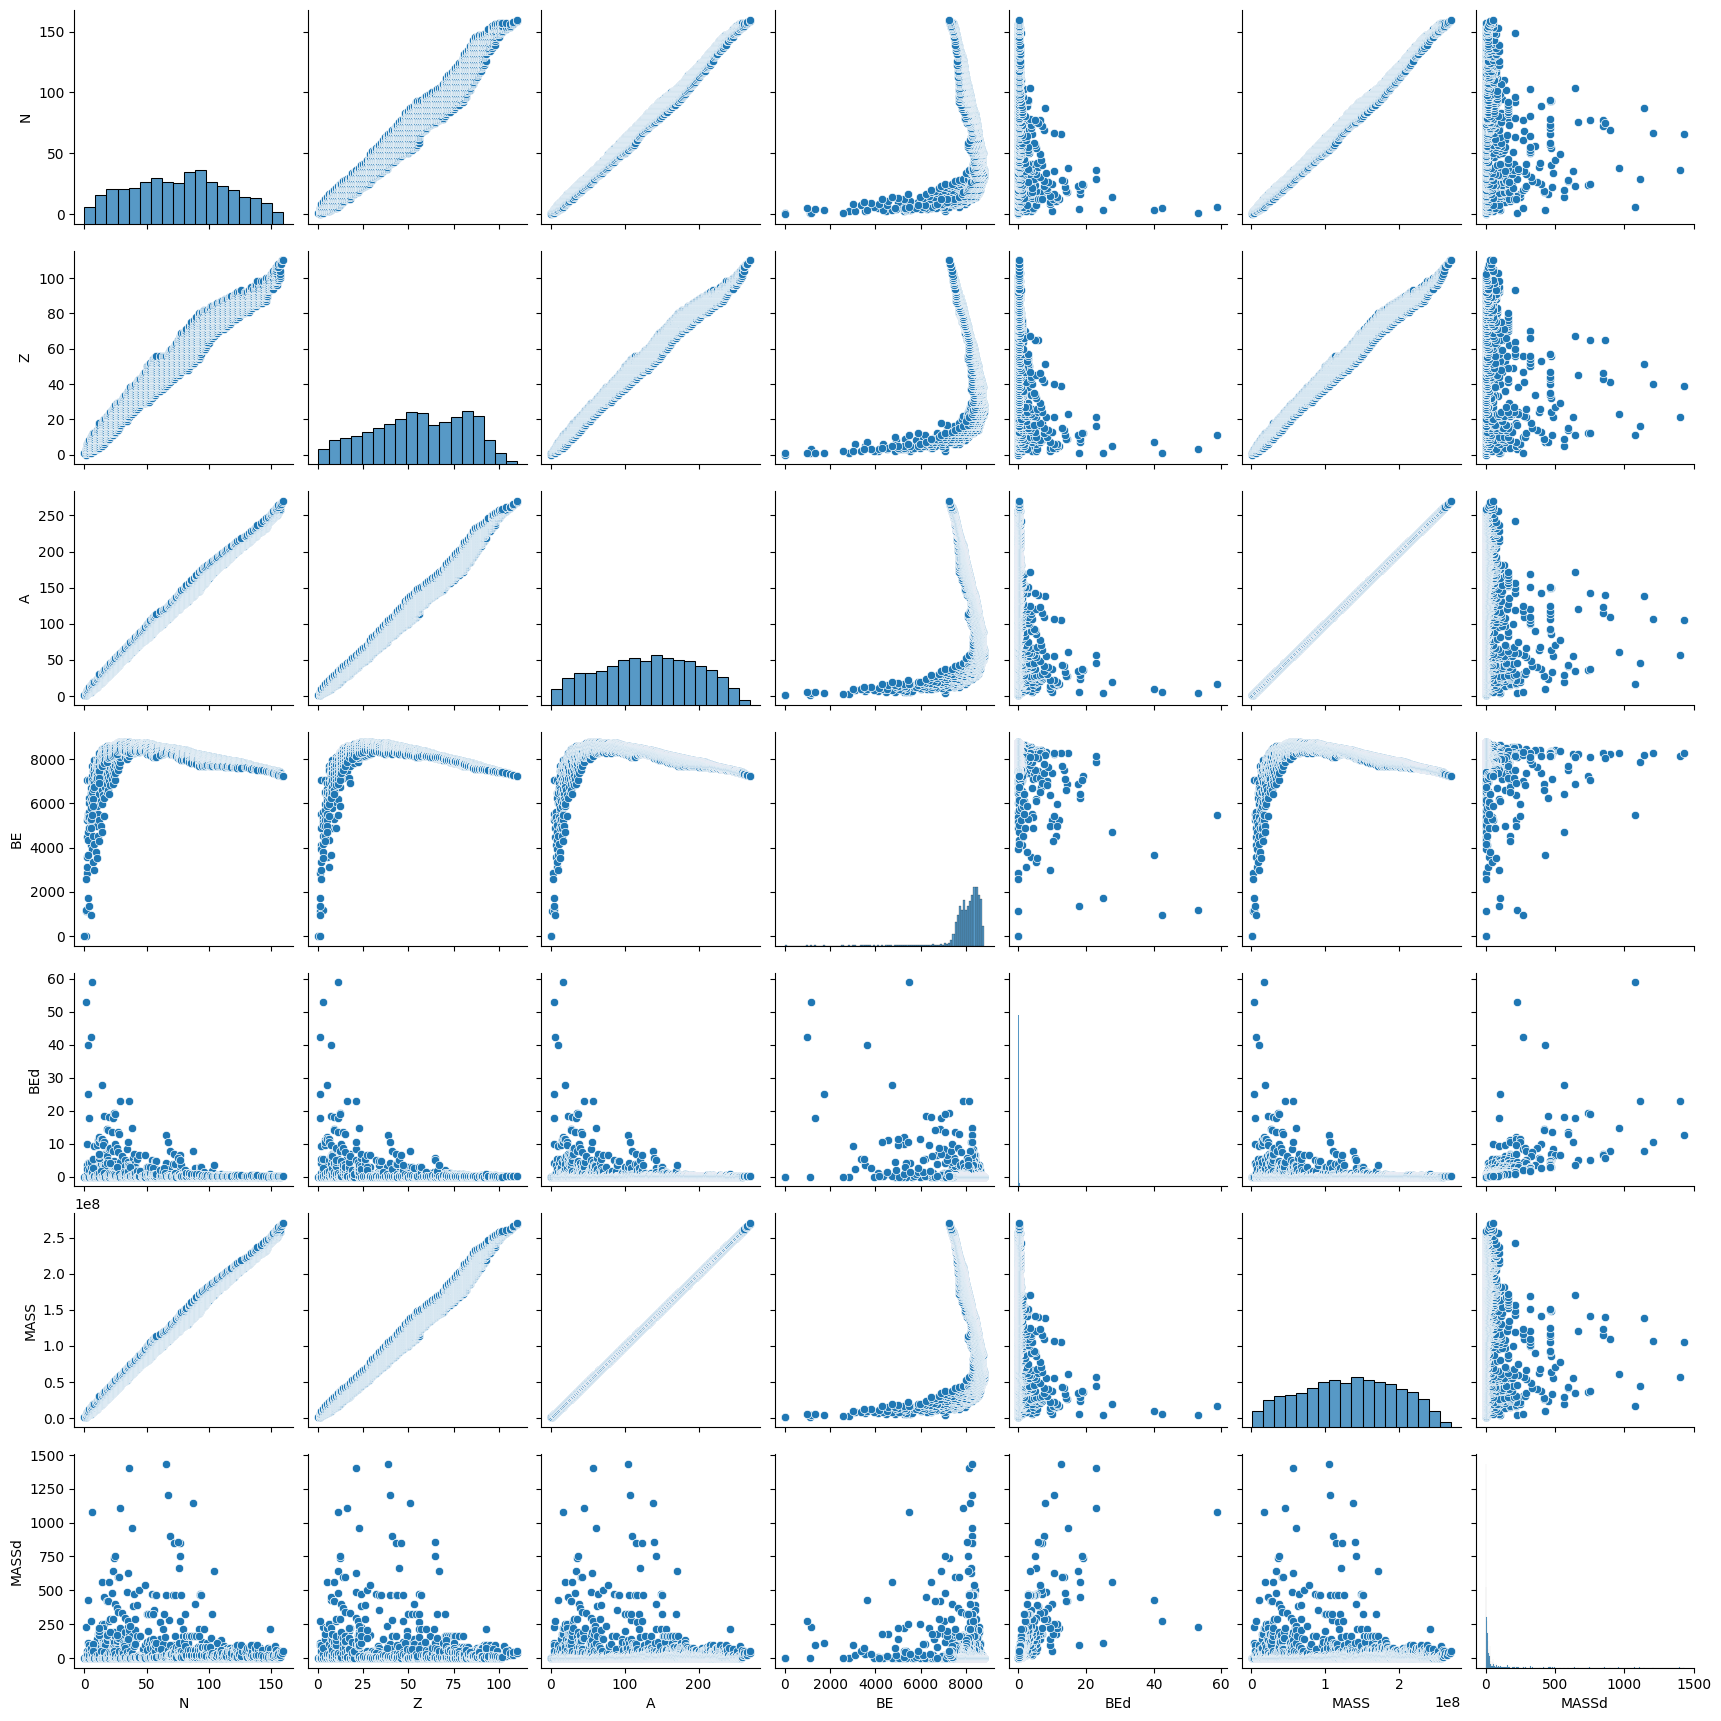

In [23]:
sns.pairplot(nuclear_data)

From the matrix of graphs above, we can start to an idea of some good relations that we may want to graph in more detail. The diagonal of the matrix is just a column plotted against itself, so not too helpful when it comes to analyzing the behavior of nuclei. Plotting N as a function of Z gives us an interesting graph showing how many isotopes occur for each element. Likewise, plotting binding energy as a function of either N, Z, or A shows us the binding energy sharply increases initially but then curves and starts to decrease. The shape of this graph is important in nuclear physics because it helps explain why some nuclei undergo fission as a decay process while others undergo fusion. Note that you may see this graph presented upside down. Plotting mass as a function of N, Z, or A does not give us anything unexpected since we would expect the mass to increase as the number of particles grows. Finally, plotting the uncertainties as a function of anything does not make sense since they only depend on the measurement they were made with.

For the third section of this notebook, we will focus on the graph of binding energy as a function of A as this graph has quite a bit of importance in nuclear physics and engineering, so displaying it in a pleasing and easy-to-understand manner is essential.

### Pairplot with Hue

If your data comes with labels for different classes, creating a `pairplot` is possible where the labels will be different colors. This is accomplished by setting the `hue` attribute equal to the column name containing the label. For the case of this nuclear data set, plotting the data such that each element is a different color may be helpful. This element symbol column ("EL") is our label. The below code cell creates a pairplot using the Dataframe only containing data with A $\leq$ 60 (to reduce the number of points). When a value of `hue` is passed, it automatically creates a legend on the side of the graph with the different labels.

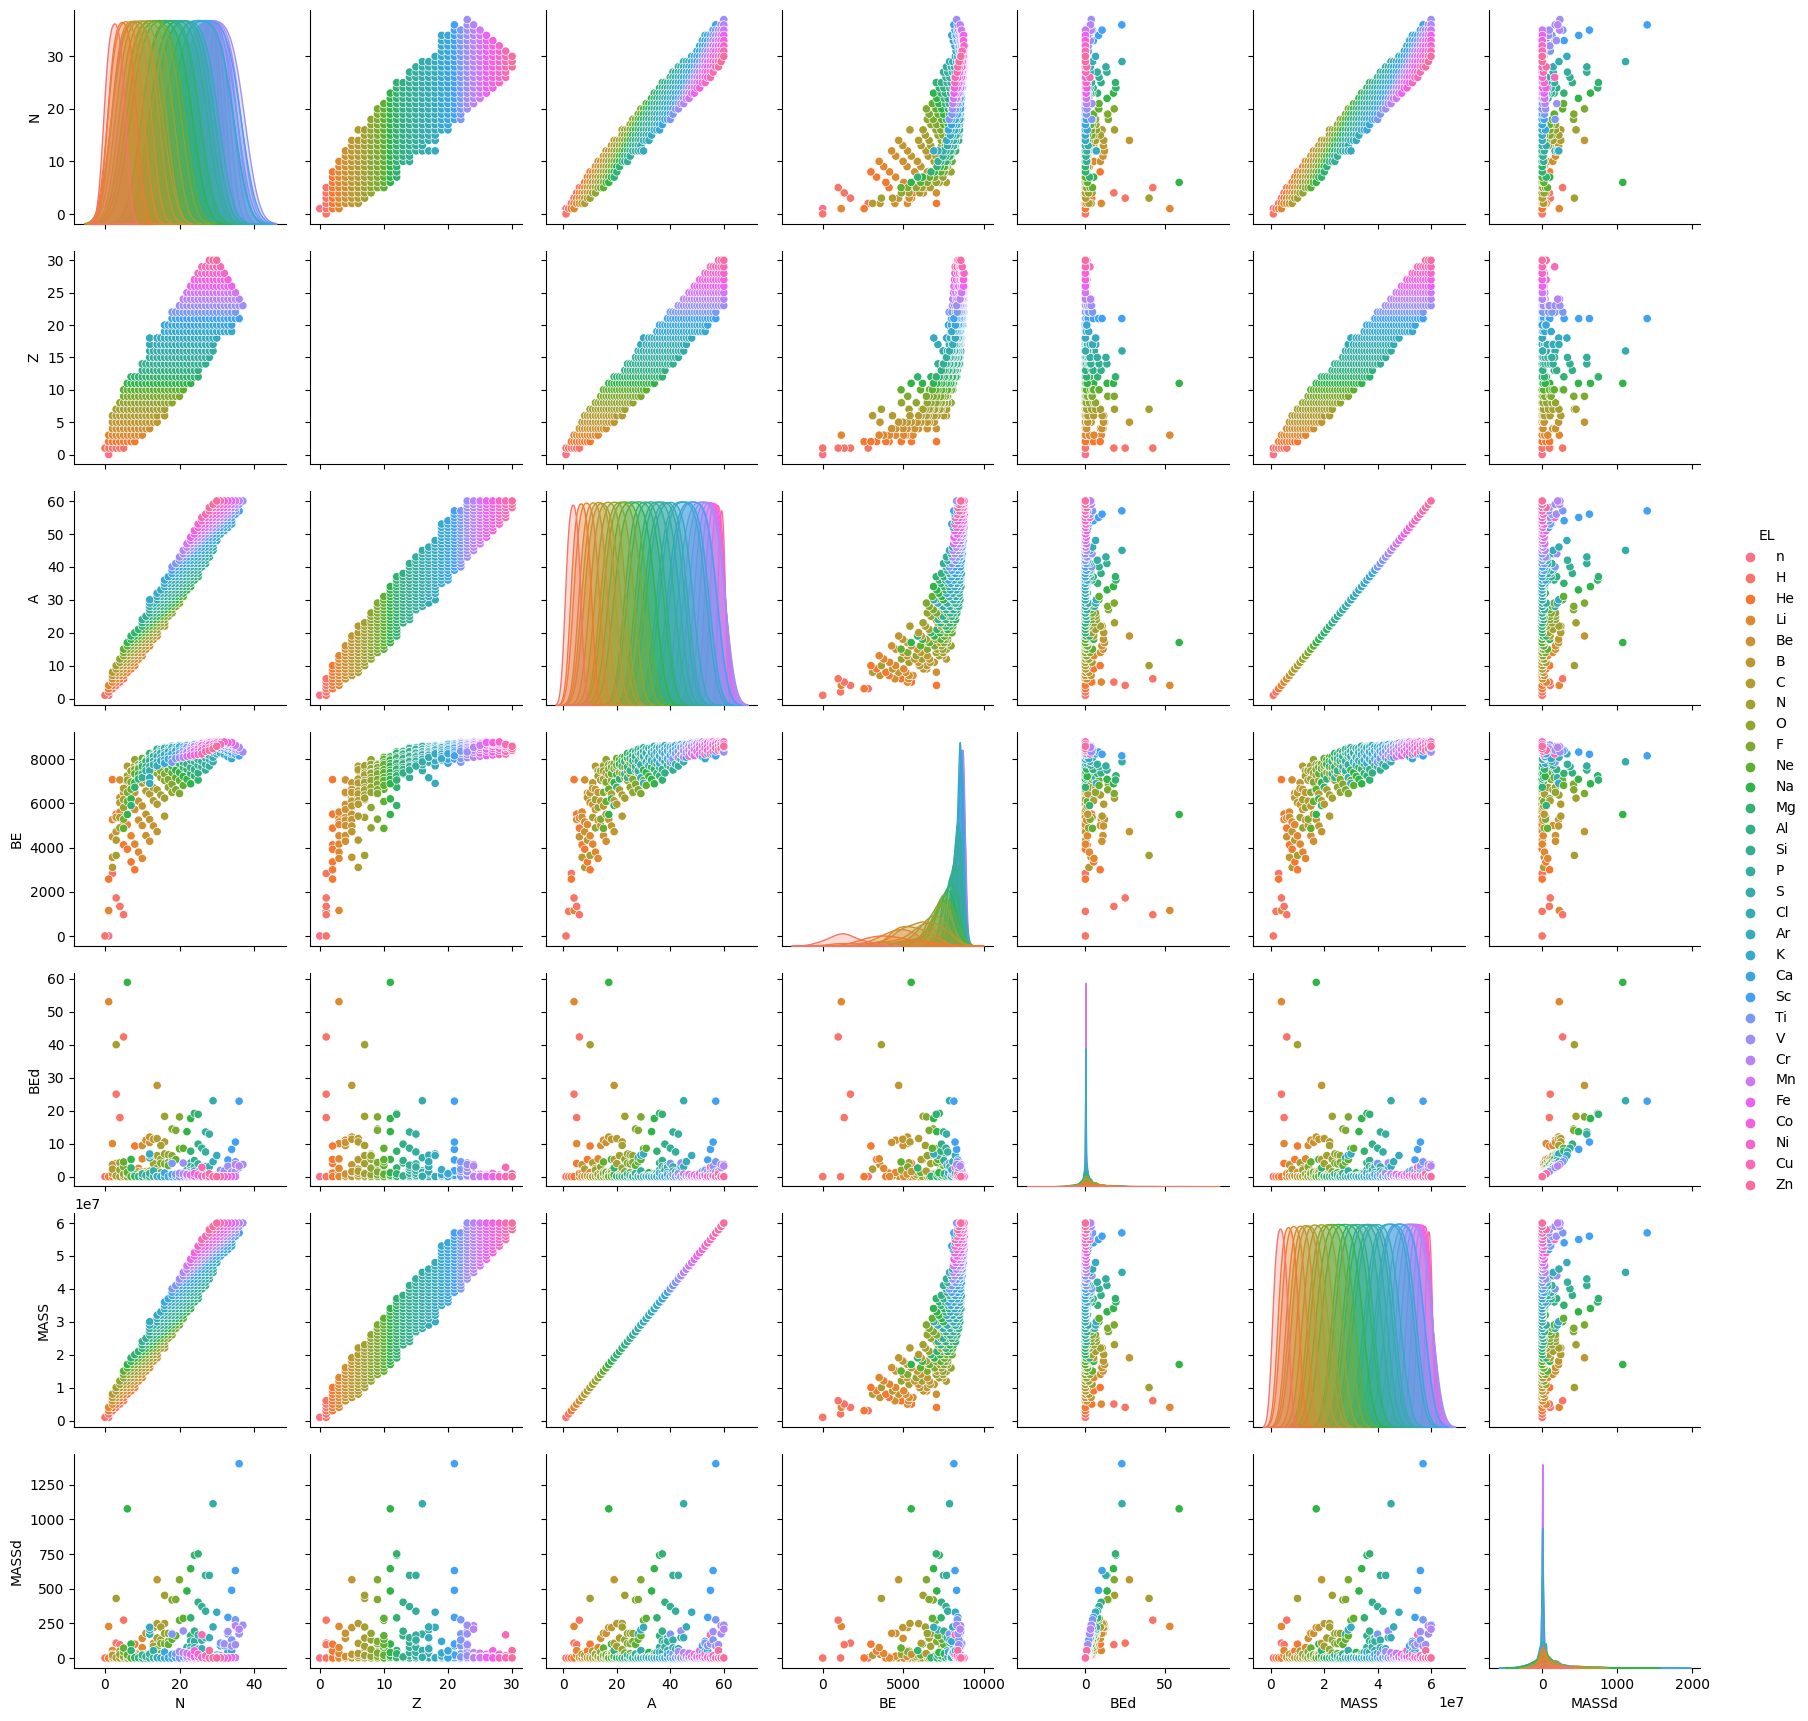

In [24]:
sns.pairplot(nuclear_data_A_below_60,hue="EL")

**EXERCISE 5:** In the below code cell, create a `pairplot` with the masked Dataframe you created in Exercise 2. Set the `hue` attribute to a relevant value for your Dataframe. The element symbols may make the most sense or another column depending on the mask you applied.

Besides `pairplot,` Seaborn contains a variety of helpful plotting tools. See some examples of graphs in [this gallery](https://seaborn.pydata.org/examples/index.html). The nice thing about Seaborn is that the graphs come preformatted with labels and legends, and color scales. This can be nice for saving time, but it does take some of the customizations out of the process. The following library we will investigate, Matplotlib, provides a lot of customization for the graphs, but it all must be done manually instead of using prebuilt style guides.

### Regplot

Another important Seaborn plot is `regplot` which is a scatterplot. It takes three main arguments: the Pandas Dataframe, the name of the column to plot on the x axis, and the name of the column to plot on the y axis.  In the below example we have also used the argument `fit_reg` and set it to False.  If this is not done then Seaborn will attempt to create a line of best fit for the data being plotted.  However, a line is obviously not the best fit for this graph so we will leave it off of the plot.  There are many other arguments that can be used to format this plot and the documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.regplot.html).

<Axes: xlabel='N', ylabel='BE'>

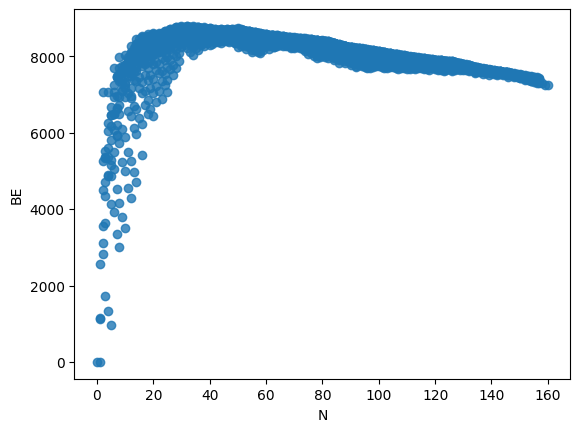

In [27]:
sns.regplot(data=nuclear_data, x="N", y="BE", fit_reg=False)

`regplot` is simply a Seaborn wrapper for the Matplotlib function `plot.scatter` which will be investigated later in this notebook.  While the `regplot` graph looks decent by default (come back and compare this graph to the first `plt.scatter` plot we will create below) it is much harder to make changes and personalize the graph when we compare it ot the Matplotlib library we will look at next.

**EXERCISE 7:** In the code cell, use `regplot` to create a plot using your masked Dataframe.  You can use your above `pairplot` to decide which graph will be the most interesting.  Play around with the different arguments found in the documentation until you have a graph you are happy with.

## Matplotlib

Now we will investigate the second plotting library: Matplotlib. Matplotlib is the most commonly used plotting library in Python, and there are many examples and tutorials on the internet for making your graphs look a certain way. For example, see [this gallery](https://matplotlib.org/stable/gallery/index.html). Matplotlib allows for a lot more customization than Seaborn, but it does require us to use the NumPy arrays we created earlier instead of just passing the Pandas Dataframe as we could do with Seaborn. Below, we will explore some typical plots in Matplotlib in two and three dimensions.

### Plot

Matplotlib makes it easy to make a simple line graph using the `plot` function, which you can read about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). For example, in the code cell below, we will plot the binding energy per nucleon as a function of the number of nucleons.

In [ ]:
plt.plot(A,BE)

The graph is quite plain with the basic `plot` statement and does not help a viewer understand the data. However, using the documentation for `plot,` we can make some changes to make the graph look better and display the data clearer.

The first thing we will do is change the color of the graph. A list of colors available in Matplotlib can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

**EXERCISE 6:** Set the variable `color` in the below cell to your chosen Matplotlib color. Make sure you make the color name a string (enclosed in `"` or `'`), and spell it exactly as it is found in the documentation. Next, run the updated plot statement and make sure the color of the plot has changed.

In [ ]:
color = 

In [ ]:
plt.plot(A,BE,color=color)

Next, we can change the line style of the plot from a solid line if desired. A list of available line styles is found [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

**EXERCISE 8:** Choose a line style you like and change the `linestyle` variable below. Ensure you are spelling the line style as shown in the documentation. Next, run the `plot` code cell and make sure the graph looks as it should.

In [ ]:
linestyle = 

In [ ]:
plt.plot(A,BE,color=color, linestyle=linestyle)

We may also want to change the line width on our plot. We can do this by setting the `linewidth` argument, where a larger number represents a thicker line.

**EXERCISE 9:** Play around with different line widths using the below two code cells until you are satisfied with the plot's appearance. You can also change the color and line style to make the plot look how you want.

In [ ]:
linewidth = 

In [ ]:
plt.plot(A,BE,color=color, linestyle=linestyle, linewidth=linewidth)

Now that the plot looks nice, we must make it easier to read. When we make a plot in physics, we always want to add labels to the x and y axes that tell what is being plotted and in what units (if applicable). In Matplotlib, we can add labels to the axes using `xlabel` and `ylabel.` See the documentation of `xlabel` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html). We can format the axes labels (font size, font style, etc.). Here, we will only change the font size.

**EXERCISE 10:** Set the variables `x_label` and `y_label` below to strings that you want to use as the x and y axes labels. Remember that the x-axis is the number of nucleons, and the y-axis is the binding energy per nucleon, measured in MeV. Also, set the `fontsize` variable to a font size you think is appropriate and readable. Run the plot cell below to ensure everything looks how you want.

In [ ]:
x_label = 
y_label = 
fontsize = 

In [ ]:
plt.plot(A,BE,color=color, linestyle=linestyle, linewidth=linewidth)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

### Scatter Plot

A line plot (where the data points are connected) may not always be the best way to display data. Another common way to display two-dimensional data is a scatter plot, where a marker represents each point, and the points are not connected. Matplotlib allows scatter plots to be created using the `scatter` function, which you can read about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Here is an example of a scatter plot using the data set we were looking at above.

In [ ]:
plt.scatter(A, BE)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

Like with the `plot,` we can change the look of a scatterplot by passing the `scatter` function a few simple values. But first, we can change the color of the markers.

**EXERCISE 11:** Set the color variable in the code cell below to any color you like. As with the `plot` statement, the available colors can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html). Next, run the plotting cell and make sure the color of the markers has changed.

In [ ]:
color = 

In [ ]:
plt.scatter(A, BE, color=color)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

The shape of the markers can also be changed using the `marker` keyword. The marker is altered by passing a symbol that represents the shape of the marker. A list of the possible markers can be found [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py). 

**EXERCISE 12:**. Change the `markerstyle` variable below to reflect the marker style you would like to make the plot with. Remember that you must make the marker style a string. An example of a possible marker style is `'^'`. Next, run the plot cell and make sure the color and the marker style have changed to reflect your preferences.

In [ ]:
markerstyle = 

In [ ]:
plt.scatter(A, BE, color=color, marker=markerstyle)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

Finally, you can change the size of each marker by changing the `s` attribute of the `scatter` function. The attribute `s` is an integer where the larger the value of `s,` the larger the markers will appear.

**EXERCISE 13:** Change the size variable below to reflect the size you want the markers to change. Next, run the plot cell to make sure your changes appear.

In [ ]:
size = 

In [ ]:
plt.scatter(A, BE, color=color, marker=markerstyle, s=size)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

### Plotting Multiple Data Sets

We often want to graph several data sets on the same plot so they can be compared. Matplotlib makes this easy, as we need to add the different `plot` (and/or `scatter`) statements in the same code cell to get them graphed on the same plot. 

For example, we often want to plot an experimental (or actual) result against a theoretical result. As we mentioned early in this notebook, the theoretical equation for the binding energies is:
$$BE = (m_hZ + m_nN - m)c^2,$$

where $m_h$ = 1.007 MeV, $m_n$ = 1.008 MeV and $c^2$ = 931.49 MeV/u. However, the data we have been working with was collected through experiments, so plotting the theoretical and experimental values of the same plot could be useful to see how they compare.

First, we will create the theoretical binding energies from the above equation and then divide them by A so they are the binding energies per nucleon to match our experimental data.

In [ ]:
c_squared = 931.49 # MeV/u
m_hydrogen = 1.007 #u
m_neutron = 1.008 #u

BE_theoretical = ((m_hydrogen*Z + m_neutron*N - mass)*c_squared)/A

Next, we can plot these theoretical binding energies with the experimental ones on the same plot using the below code, where the experimental energies will be a scatter plot and the theoretical values will be a line plot.

In [ ]:
plt.scatter(A, BE, color=color, marker=markerstyle, s=size)
plt.plot(A, BE_theoretical, linewidth=2, color='red')
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)

Since we created the plot, we know which data set is which is not apparent to another person viewing the graph. To help with telling the two plots apart, we will want to add a legend. We will do this by adding the `label` attribute to each plotting statement (`plot` and `scatter`), and then we will add a `plt.legend` statement at the end of the cell. We can set the font size of the legend using the `fontsize` attribute. There are other attributes of the legend statement that you can find [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib-pyplot-legend).

The below code cell adds legends and labels to our graph to make it more readable.

In [ ]:
plt.scatter(A, BE, color=color, marker=markerstyle, s=size, label="Experimental")
plt.plot(A, BE_theoretical, linewidth=2, color='red', label="Theoretical")
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)
plt.legend(fontsize=fontsize)

The liquid drop model is a semi-empirical formula for calculating the binding energies of the various nuclei using only N and Z (remember that A = N + Z). A semi-empirical formula is a formula whose form is partially based on theory but with coefficients that fit using experimental data. For example, the liquid drop model can be defined as:

$$BE_{liquid\ drop}(N,Z) = a_vA - a_sA^{2/3} - a_c \frac{Z(Z-1)}{A^{1/3}} - a_A\frac{(N-Z)^2}{A} + \delta (N,Z),$$

where the coefficients $a_v$, $a_s$, $a_c$, $a_A$ and the function $\delta(N,Z)$ are determined using experimental data. Numerical values for these and an explanation for each term in the equation can be found [here](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula#The_liquid-drop_model).

The code cell below uses the liquid drop model to calculate the binding energy per nucleon for all the nuclei given in the in

In [ ]:
aV = 15.76
aS = 17.81
aC = 0.711
aA = 23.702
BE_liquid_drop = []
for i in range(len(BE)):
    energy = aV*A[i] - aS*A[i]**(2/3) - aC*Z[i]*(Z[i]-1)/A[i]**(1/3) - aA*(N[i]-Z[i])**2/A[i]
    if Z[i]%2==0 and N[i]%2==0:
        energy += 34/A[i]**(3/4)
    elif Z[i]%2==1 and N[i]%2==1:
        energy -= 34/A[i]**(3/4)
    else:
        energy += 0
    BE_liquid_drop.append(energy)

BE_liquid_drop /= A

**EXERCISE 14:** In the code cell below, plot the experimental binding energies per nucleon, the theoretical binding energies per nucleon, and the binding energies per nucleon from the liquid drop model. You can use any combination of `plot` and `scatter,` along with colors, line widths, marker sizes, and styles. Make a graph that you find visually appealing. Ensure you add a readable x label, y label, and legend.

### Plotting Three-Dimensional Data

Previously we have only created two-dimensional graphs with one independent variable (the number of nucleons) and one dependent variable (the binding energy per nucleon). However, sometimes we want to make three dimension plots with two independent variables and one dependent variable. In this case, we want to see how the binding energy per nucleon varies as a function of the number of neutrons and protons in the nucleus. The below code cell creates the two-dimensional NumPy array where each row corresponds to increasing protons (the first row is zero protons, the second row is one proton, and so on). Each column corresponds to an increasing number of neutrons. Each element the in the matrix is the binding energy per nucleon for that row's number of neutrons and that column's number of neutrons. Then, the number of protons and neutrons is formatted for three-dimensional graphing.

In [ ]:
BE_dict = {}
for i in range(len(N)):
    value = [Z[i], N[i]]
    BE_dict[BE[i]] = value

BE_2D = np.zeros((np.max(Z)+1,np.max(N)+1))

for i in range(len(BE)):
    z,n = BE_dict[BE[i]]
    BE_2D[z][n] = BE[i] 

z = BE_2D
nrows, ncols = BE_2D.shape
Z_2D = np.linspace(np.min(Z), np.max(Z), ncols)
N_2D = np.linspace(np.min(N), np.max(N), nrows)
Z_2D, N_2D = np.meshgrid(Z_2D, N_2D)       

### Three-Dimensional Scatter Plots

There are many types of three-dimensional plots you can make in Matplotlib. See [this page](https://matplotlib.org/stable/gallery/mplot3d/index.html) for some examples. The first three-dimensional plot we will look at is the three-dimensional scatter plot, which you can read about [here](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py). The below code cell makes a three-dimensional scatter plot with our data, using the same `scatter` statement we were previously using. However, first, we must use a `subplots` statement to set the projection of our graph to `3d`. The only other change from our previous scatter plots is now we must use `ax.scatter` instead of `plt.scatter` to make the plot three-dimensional.

In [ ]:
# Create a three dimensional plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# Add a three dimensional scatter plot with Z and N on the 
# x and y axes and the binding energies on the z axis.
ax.scatter(Z_2D,N_2D,BE_2D)

We can make several improvements to this graph to make it easier to read. In addition to the previous modifications (adding labels, changing the color, marker size, and marker style), we can make other improvements. Since only some combinations of Z and N yield a nucleus, there are a lot of zeros in this plot that are distracting. Let's remove these and see if that makes for a better graph. The below cell makes a copy of `BE_2D_no_zeros`, which eliminates all of the zeros by setting them to NaN (not a number), and thus they will not be plotted.

In [ ]:
BE_2D_no_zeros = BE_2D.copy()
BE_2D_no_zeros[ BE_2D_no_zeros==0 ] = np.nan

**EXERCISE 15:** Create a three-dimensional scatter plot with the new matrix (`BE_2D_no_zeros`) in the code cell below. Set the color, marker style, and marker size to values you like, and then add x, y, and z labels.

### Surface Plot

Another type of three-dimensional plot is called a surface plot. Surface plots can be helpful because they use color to help show the values of the z data (in this case, the binding energies per nucleon). The `colorbar` on the right of the plot gives numbers for what each of the colors represents.

In [ ]:
# Create a three dimensional plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Create a surface plot where the colors are "cool warm".  This is
# set by setting the cmap (color map).
surf = ax.plot_surface(Z_2D, N_2D, BE_2D_no_zeros, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf)

### Heat Maps

The final form of three-dimensional plotting we will look at is a heat map, a typical plot used to visualize the values in a matrix. The matrix is represented with a plane of squares, with the color of a square corresponding to the value of the matrix element in the exact location. For example, we can create a heat map of our binding energies matrix `BE_2D` using the `matshow` function to create a heat map. You can read about `matshow` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html).

In [ ]:
cax = plt.matshow(BE_2D)

While we have a heat map, we do not have any context for the colors. We can add a color bar that shows the numerical values associated with each color (the same as for the surface plot).

In [ ]:
cax = plt.matshow(BE_2D)
plt.colorbar(cax)

We can also change the colors of the heat map using the `cmap` attribute. Here I use the colormap "magma," but a complete list of the possible colormaps can be found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [ ]:
cax = plt.matshow(BE_2D, cmap="magma")
plt.colorbar(cax)

**EXERCISE 16:** Create a heat map of `BE_2D` in the code cell below with your chosen heat map.  Add a color bar, an x label, an y label, and a title to the graph (using `plt.title`).

### Error Bars and Uncertainty

Many physical data sets have an associated error or uncertainty on each data point. For the binding energies the uncertainties for each point are stored in the array `BE_uncertainity.` There are two ways to display these uncertainties graphically: we can add error bars to each point (using the `errorbar` function shown [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)) or by added a shaded region to represent the uncertainty (using the `fill_between` function shown [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)).


The below two code cells set up these two different types of graphs.


In [ ]:
plt.errorbar(A,BE,BE_uncertainity)

In [ ]:
plt.scatter(A,BE)
plt.fill_between(A.ravel(),BE - BE_uncertainity,
    BE+ BE_uncertainity,alpha=0.2)


Fortunately for nuclear scientists, but unfortunately for us, the uncertainties on these binding energy measurements are pretty small and do not show up well in the graphs. To better understand how these plots can look, let's make some fake uncertainty data that will be large enough to show up in the plots.

In [ ]:
BE_uncertainity_fake = BE*(np.random.random(len(BE))*.25)

Now, lets create both types of uncertainity plots using the fake uncertainites to see the difference.

In [ ]:
plt.errorbar(A,BE,BE_uncertainity_fake)

In [ ]:
plt.scatter(A,BE)
plt.fill_between(A.ravel(),BE - BE_uncertainity_fake,
    BE + BE_uncertainity_fake,alpha=0.2)


**EXERCISE 17:** Create either an `errorbar` plot or a scatter plot with the `fill_between` function to show the uncertainty in the below code cell. Change the colors, marker sizes, etc., to get a graph you like. You can also set new attributes, such as `capsize` for the `errorbar` plot or `alpha` for the `fill_inbetween` function. Add an x label and a y label. If you use `fill_between,` you can also add a legend where the `scatter` statement and the `fill_between` have different labels.

## Conclusion

In this notebook, we have explored how the three libraries Pandas, Seaborn, and Matplotlib can be used to examine and display a data set. These libraries have many applications across data science and other fields, and you will encounter them many times while using Python. 


## Further Resources

If you want to learn more about any of the libraries presented here, the websites for each library are a great place to start.

* [Pandas website](https://pandas.pydata.org)
* [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
* [Seaborn website](https://seaborn.pydata.org)
* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)
* [Seaborn User Guide and Tutorials](https://seaborn.pydata.org/tutorial.html)
* [Matplotlib website](https://matplotlib.org/stable/index.html)
* [Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)
* [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

A histogram is a commin type of graph used in some fields of physics, including especially particle physics.  There is a DSECOP module avalibale for creating and analyzing data with histograms avaliable [here](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/main/Intro_to_Data_Processing_with_Histograms).